# Build and install the package

First patch `pyo3-polars`:

- Use [this diff](https://github.com/pola-rs/pyo3-polars/compare/main...Magnus167:pyo3-polars:main) to make changes to the `pyo3-polars` package.

Install the package:

```bash
python -m venv .venv
# source .venv/bin/activate
./.venv/Scripts/activate
pip install uv
uv pip install maturin jupyter notebook ipython ipywidgets pyarrow  polars macrosynergy --upgrade

maturin develop --release
```


In [1]:
! uv pip install maturin jupyter notebook ipython ipywidgets pyarrow  polars macrosynergy --upgrade


Using Python 3.12.4 environment at: E:\Work\ruzt\msyrs\.venv
Resolved 121 packages in 221ms
Audited 121 packages in 0.12ms


### Import Python packages


In [2]:
import macrosynergy
import pandas as pd
import numpy as np
import polars as pl
import os

from macrosynergy.panel import view_timelines
from macrosynergy.management.types import QuantamentalDataFrame


### Import Python bindings - `msyrs`


In [3]:
import msyrs

In [4]:
DATA_FOLDER_PATH = "E:/Work/jpmaqs-data"
# DATA_FOLDER_PATH = "C:/Users/PalashTyagi/Code/go-dataquery/jpmaqs-data"
DQ_CLIENT_ID = os.getenv("DQ_CLIENT_ID")
DQ_CLIENT_SECRET = os.getenv("DQ_CLIENT_SECRET")

In [5]:
import time

nb_start_time = time.time()

In [6]:
dfpath = f"{DATA_FOLDER_PATH}/data/ADPEMPL_SA_P1M1ML1/USD_ADPEMPL_SA_P1M1ML1.csv"

starttime = time.time()
ldf: pl.DataFrame = msyrs.qdf.load_qdf(dfpath)
print(f"Time taken to load qdf: {time.time() - starttime}")
ldf.head(5)

Time taken to load qdf: 0.004353046417236328


shape: (5, 7)
┌────────────┬─────┬────────────────────┬───────────┬─────────┬─────────┬─────────┐
│ real_date  ┆ cid ┆ xcat               ┆ value     ┆ grading ┆ eop_lag ┆ mop_lag │
│ ---        ┆ --- ┆ ---                ┆ ---       ┆ ---     ┆ ---     ┆ ---     │
│ date       ┆ str ┆ str                ┆ f64       ┆ f64     ┆ i64     ┆ i64     │
╞════════════╪═════╪════════════════════╪═══════════╪═════════╪═════════╪═════════╡
│ 2010-03-03 ┆ USD ┆ ADPEMPL_SA_P1M1ML1 ┆ -0.173806 ┆ 3.0     ┆ 3       ┆ 33      │
│ 2010-03-04 ┆ USD ┆ ADPEMPL_SA_P1M1ML1 ┆ -0.173806 ┆ 3.0     ┆ 4       ┆ 34      │
│ 2010-03-05 ┆ USD ┆ ADPEMPL_SA_P1M1ML1 ┆ -0.173806 ┆ 3.0     ┆ 5       ┆ 35      │
│ 2010-03-08 ┆ USD ┆ ADPEMPL_SA_P1M1ML1 ┆ -0.173806 ┆ 3.0     ┆ 8       ┆ 38      │
│ 2010-03-09 ┆ USD ┆ ADPEMPL_SA_P1M1ML1 ┆ -0.173806 ┆ 3.0     ┆ 9       ┆ 39      │
└────────────┴─────┴────────────────────┴───────────┴─────────┴─────────┴─────────┘

In [7]:
cids_dm = "AUD.CAD.CHF.EUR.GBP.JPY.NOK.NZD.SEK.USD".split(".")
cids_em = "CLP.COP.CZK.HUF.IDR.ILS.INR.KRW.MXN.PLN.THB.TRY.TWD.ZAR".split(".")
cids = cids_dm + cids_em
cids_dux = list(set(cids) - set(["IDR", "NZD"]))
ecos = "CPIC_SA_P1M1ML12.CPIC_SJA_P3M3ML3AR.CPIC_SJA_P6M6ML6AR.CPIH_SA_P1M1ML12.CPIH_SJA_P3M3ML3AR.CPIH_SJA_P6M6ML6AR.INFTEFF_NSA.INTRGDP_NSA_P1M1ML12_3MMA.INTRGDPv5Y_NSA_P1M1ML12_3MMA.PCREDITGDP_SJA_D1M1ML12.RGDP_SA_P1Q1QL4_20QMA.RYLDIRS02Y_NSA.RYLDIRS05Y_NSA.PCREDITBN_SJA_P1M1ML12".split(
    "."
)


mkts = "DU02YXR_NSA.DU05YXR_NSA.DU02YXR_VT10.DU05YXR_VT10.EQXR_NSA.EQXR_VT10.FXXR_NSA.FXXR_VT10.FXCRR_NSA.FXTARGETED_NSA.FXUNTRADABLE_NSA".split(
    "."
)
xcats = ecos + mkts

tickers = [f"{c}_{x}" for c in cids for x in xcats]

In [8]:
# downloaded_df: pl.DataFrame = msyrs.download.download_jpmaqs_indicators_as_df(
#     client_id=DQ_CLIENT_ID,
#     client_secret=DQ_CLIENT_SECRET,
#     tickers=tickers,
# )
# downloaded_df.head(5)

In [9]:
downloaded_df = None

In [10]:
# pddf = macrosynergy.download.JPMaQSDownload().download(
#     tickers=tickers,
#     get_catalogue=True,
#     show_progress=True,
#     start_date="1990-01-01",
# )
# pddf = macrosynergy.management.types.QuantamentalDataFrame(pddf)

In [11]:
starttime = time.time()

big_df: pl.DataFrame = msyrs.qdf.load_qdf_from_download_bank(

    folder_path=DATA_FOLDER_PATH,
    xcats=xcats,

    # folder_path=DATA_FOLDER_PATH, cids=cids

)
print(f"Time taken to load qdf batch: {time.time() - starttime}")


big_df.head(5)

Time taken to load qdf batch: 1.1629588603973389


shape: (5, 7)
┌────────────┬─────┬──────────────────┬──────────┬─────────┬─────────┬─────────┐
│ real_date  ┆ cid ┆ xcat             ┆ value    ┆ grading ┆ eop_lag ┆ mop_lag │
│ ---        ┆ --- ┆ ---              ┆ ---      ┆ ---     ┆ ---     ┆ ---     │
│ date       ┆ str ┆ str              ┆ f64      ┆ f64     ┆ i64     ┆ i64     │
╞════════════╪═════╪══════════════════╪══════════╪═════════╪═════════╪═════════╡
│ 1990-04-26 ┆ AUD ┆ CPIC_SA_P1M1ML12 ┆ 6.434599 ┆ 2.0     ┆ 26      ┆ 223     │
│ 1990-04-27 ┆ AUD ┆ CPIC_SA_P1M1ML12 ┆ 6.434599 ┆ 2.0     ┆ 27      ┆ 224     │
│ 1990-04-30 ┆ AUD ┆ CPIC_SA_P1M1ML12 ┆ 6.434599 ┆ 2.0     ┆ 30      ┆ 227     │
│ 1990-05-01 ┆ AUD ┆ CPIC_SA_P1M1ML12 ┆ 6.434599 ┆ 2.0     ┆ 31      ┆ 228     │
│ 1990-05-02 ┆ AUD ┆ CPIC_SA_P1M1ML12 ┆ 6.434599 ┆ 2.0     ┆ 32      ┆ 229     │
└────────────┴─────┴──────────────────┴──────────┴─────────┴─────────┴─────────┘

In [12]:
big_df.estimated_size("mb")

275.7299613952637

In [13]:
big_df.to_pandas()

real_date  cid              xcat     value  grading  eop_lag  mop_lag
0       1990-04-26  AUD  CPIC_SA_P1M1ML12  6.434599      2.0       26      223
1       1990-04-27  AUD  CPIC_SA_P1M1ML12  6.434599      2.0       27      224
2       1990-04-30  AUD  CPIC_SA_P1M1ML12  6.434599      2.0       30      227
3       1990-05-01  AUD  CPIC_SA_P1M1ML12  6.434599      2.0       31      228
4       1990-05-02  AUD  CPIC_SA_P1M1ML12  6.434599      2.0       32      229
...            ...  ...               ...       ...      ...      ...      ...
5285577 2024-11-08  ZAR    RYLDIRS05Y_NSA  3.097534      1.0        0        0
5285578 2024-11-12  ZAR    RYLDIRS05Y_NSA  3.189884      1.0        0        0
5285579 2024-11-13  ZAR    RYLDIRS05Y_NSA  3.108095      1.0        0        0
5285580 2024-11-14  ZAR    RYLDIRS05Y_NSA  3.060968      1.0        0        0
5285581 2024-11-15  ZAR    RYLDIRS05Y_NSA  3.102066      1.0        0        0

[5285582 rows x 7 columns]

In [14]:
big_df.to_pandas().memory_usage(deep=True).sum() / 1024**2

789.8839149475098

In [15]:
QuantamentalDataFrame(big_df.to_pandas())

real_date  cid              xcat     value  grading  eop_lag  mop_lag
0       1990-04-26  AUD  CPIC_SA_P1M1ML12  6.434599      2.0       26      223
1       1990-04-27  AUD  CPIC_SA_P1M1ML12  6.434599      2.0       27      224
2       1990-04-30  AUD  CPIC_SA_P1M1ML12  6.434599      2.0       30      227
3       1990-05-01  AUD  CPIC_SA_P1M1ML12  6.434599      2.0       31      228
4       1990-05-02  AUD  CPIC_SA_P1M1ML12  6.434599      2.0       32      229
...            ...  ...               ...       ...      ...      ...      ...
5285577 2024-11-08  ZAR    RYLDIRS05Y_NSA  3.097534      1.0        0        0
5285578 2024-11-12  ZAR    RYLDIRS05Y_NSA  3.189884      1.0        0        0
5285579 2024-11-13  ZAR    RYLDIRS05Y_NSA  3.108095      1.0        0        0
5285580 2024-11-14  ZAR    RYLDIRS05Y_NSA  3.060968      1.0        0        0
5285581 2024-11-15  ZAR    RYLDIRS05Y_NSA  3.102066      1.0        0        0

[5285582 rows x 7 columns]

In [16]:
macrosynergy.management.types.QuantamentalDataFrame(big_df.to_pandas()).memory_usage(
    deep=True
).sum() / 1024**2

211.71554374694824

In [17]:
sel_cids = ["USD", "EUR", "GBP", "AUD", "CAD"]
start = "1990-01-01"

In [18]:
starttime = time.time()
eq_df = msyrs.qdf.reduce_dataframe(
    df=big_df,
    cids=sel_cids,
    xcats=["EQXR_NSA", "EQXR_VT10"],

    start=start,
)
print(f"Time taken to reduce qdf: {time.time() - starttime}")
eq_df

Time taken to reduce qdf: 0.24176740646362305


shape: (73_069, 7)
┌────────────┬─────┬───────────┬───────────┬─────────┬─────────┬─────────┐
│ real_date  ┆ cid ┆ xcat      ┆ value     ┆ grading ┆ eop_lag ┆ mop_lag │
│ ---        ┆ --- ┆ ---       ┆ ---       ┆ ---     ┆ ---     ┆ ---     │
│ date       ┆ str ┆ str       ┆ f64       ┆ f64     ┆ i64     ┆ i64     │
╞════════════╪═════╪═══════════╪═══════════╪═════════╪═════════╪═════════╡
│ 2000-05-04 ┆ AUD ┆ EQXR_NSA  ┆ -1.251605 ┆ 1.0     ┆ 0       ┆ 0       │
│ 2000-05-05 ┆ AUD ┆ EQXR_NSA  ┆ 1.787455  ┆ 1.0     ┆ 0       ┆ 0       │
│ 2000-05-08 ┆ AUD ┆ EQXR_NSA  ┆ -0.574713 ┆ 1.0     ┆ 0       ┆ 0       │
│ 2000-05-09 ┆ AUD ┆ EQXR_NSA  ┆ -0.931278 ┆ 1.0     ┆ 0       ┆ 0       │
│ 2000-05-10 ┆ AUD ┆ EQXR_NSA  ┆ -1.523501 ┆ 1.0     ┆ 0       ┆ 0       │
│ …          ┆ …   ┆ …         ┆ …         ┆ …       ┆ …       ┆ …       │
│ 2024-11-08 ┆ USD ┆ EQXR_VT10 ┆ 0.313875  ┆ 1.0     ┆ 0       ┆ 0       │
│ 2024-11-12 ┆ USD ┆ EQXR_VT10 ┆ -0.272457 ┆ 1.0     ┆ 0       ┆ 0       │
│ 2024-11-13 ┆ USD ┆ EQXR_VT10 ┆ 0.043729  ┆ 1.0     ┆ 0       ┆ 0       │
│ 2024-11-14 ┆ USD ┆ EQXR_VT10 ┆ -0.549983 ┆ 1.0     ┆ 0       ┆ 0       │
│ 2024-11-15 ┆ USD ┆ EQXR_VT10 ┆ -1.198544 ┆ 1.0     ┆ 0       ┆ 0       │
└────────────┴─────┴───────────┴───────────┴─────────┴─────────┴─────────┘

In [19]:
# starttime = time.time()
# eq_pd_df = pddf.reduce_df(cids=sel_cids, xcats=["EQXR_NSA", "EQXR_VT10"], start=start)
# print(f"Time taken to reduce qdf: {time.time() - starttime}")

In [20]:
fx_xcats = [xc for xc in xcats if xc.startswith("FX")]
starttime = time.time()

fx_df = msyrs.qdf.reduce_dataframe(
    df=big_df, cids=sel_cids, start=start, xcats=fx_xcats, intersect=True
)
print(f"Time taken to reduce qdf: {time.time() - starttime}")

Time taken to reduce qdf: 0.2830348014831543


In [21]:
# starttime = time.time()
# fx_pd_df = pddf.reduce_df(cids=sel_cids, xcats=fx_xcats, start=start, intersect=True)
# print(f"Time taken to reduce qdf: {time.time() - starttime}")

In [22]:
starttime = time.time()
new_df: pl.DataFrame = msyrs.qdf.update_dataframe(df=eq_df, df_add=fx_df)
print("Time taken: ", time.time() - starttime)
new_df.head(10)

Time taken:  0.033199310302734375


shape: (10, 7)
┌────────────┬─────┬──────────┬───────────┬─────────┬─────────┬─────────┐
│ real_date  ┆ cid ┆ xcat     ┆ value     ┆ grading ┆ eop_lag ┆ mop_lag │
│ ---        ┆ --- ┆ ---      ┆ ---       ┆ ---     ┆ ---     ┆ ---     │
│ date       ┆ str ┆ str      ┆ f64       ┆ f64     ┆ i64     ┆ i64     │
╞════════════╪═════╪══════════╪═══════════╪═════════╪═════════╪═════════╡
│ 2000-05-04 ┆ AUD ┆ EQXR_NSA ┆ -1.251605 ┆ 1.0     ┆ 0       ┆ 0       │
│ 2000-05-05 ┆ AUD ┆ EQXR_NSA ┆ 1.787455  ┆ 1.0     ┆ 0       ┆ 0       │
│ 2000-05-08 ┆ AUD ┆ EQXR_NSA ┆ -0.574713 ┆ 1.0     ┆ 0       ┆ 0       │
│ 2000-05-09 ┆ AUD ┆ EQXR_NSA ┆ -0.931278 ┆ 1.0     ┆ 0       ┆ 0       │
│ 2000-05-10 ┆ AUD ┆ EQXR_NSA ┆ -1.523501 ┆ 1.0     ┆ 0       ┆ 0       │
│ 2000-05-11 ┆ AUD ┆ EQXR_NSA ┆ -1.579987 ┆ 1.0     ┆ 0       ┆ 0       │
│ 2000-05-12 ┆ AUD ┆ EQXR_NSA ┆ 1.80602   ┆ 1.0     ┆ 0       ┆ 0       │
│ 2000-05-15 ┆ AUD ┆ EQXR_NSA ┆ 0.295664  ┆ 1.0     ┆ 0       ┆ 0       │
│ 2000-05-16 ┆ AUD ┆ EQXR_NSA ┆ 1.310187  ┆ 1.0     ┆ 0       ┆ 0       │
│ 2000-05-17 ┆ AUD ┆ EQXR_NSA ┆ -0.711284 ┆ 1.0     ┆ 0       ┆ 0       │
└────────────┴─────┴──────────┴───────────┴─────────┴─────────┴─────────┘

In [23]:
# starttime = time.time()
# new_pd_df = pddf.update_df(df_add=eq_pd_df,)
# print("Time taken: ", time.time() - starttime)

In [24]:
new_df.tail(10)

shape: (10, 7)
┌────────────┬─────┬───────────┬───────────┬─────────┬─────────┬─────────┐
│ real_date  ┆ cid ┆ xcat      ┆ value     ┆ grading ┆ eop_lag ┆ mop_lag │
│ ---        ┆ --- ┆ ---       ┆ ---       ┆ ---     ┆ ---     ┆ ---     │
│ date       ┆ str ┆ str       ┆ f64       ┆ f64     ┆ i64     ┆ i64     │
╞════════════╪═════╪═══════════╪═══════════╪═════════╪═════════╪═════════╡
│ 2024-11-01 ┆ GBP ┆ FXXR_VT10 ┆ 1.37805   ┆ 1.0     ┆ 0       ┆ 0       │
│ 2024-11-04 ┆ GBP ┆ FXXR_VT10 ┆ -0.111931 ┆ 1.0     ┆ 0       ┆ 0       │
│ 2024-11-05 ┆ GBP ┆ FXXR_VT10 ┆ 0.25294   ┆ 1.0     ┆ 0       ┆ 0       │
│ 2024-11-06 ┆ GBP ┆ FXXR_VT10 ┆ -0.175161 ┆ 1.0     ┆ 0       ┆ 0       │
│ 2024-11-07 ┆ GBP ┆ FXXR_VT10 ┆ 0.806682  ┆ 1.0     ┆ 0       ┆ 0       │
│ 2024-11-08 ┆ GBP ┆ FXXR_VT10 ┆ -0.247346 ┆ 1.0     ┆ 0       ┆ 0       │
│ 2024-11-12 ┆ GBP ┆ FXXR_VT10 ┆ -1.083137 ┆ 1.0     ┆ 0       ┆ 0       │
│ 2024-11-13 ┆ GBP ┆ FXXR_VT10 ┆ -0.328958 ┆ 1.0     ┆ 0       ┆ 0       │
│ 2024-11-14 ┆ GBP ┆ FXXR_VT10 ┆ -0.110526 ┆ 1.0     ┆ 0       ┆ 0       │
│ 2024-11-15 ┆ GBP ┆ FXXR_VT10 ┆ -0.700977 ┆ 1.0     ┆ 0       ┆ 0       │
└────────────┴─────┴───────────┴───────────┴─────────┴─────────┴─────────┘

In [25]:
# df: polars::prelude::DataFrame,
# xcat: String,
# cids: Option<Vec<String>>,
# lback_periods: Option<usize>,
# lback_method: Option<String>,
# half_life: Option<f64>,
# start: Option<String>,
# end: Option<String>,
# est_freq: Option<String>,
# remove_zeros: Option<bool>,
# postfix: Option<String>,
# nan_tolerance: Option<f64>,

starttime = time.time()
hv = msyrs.panel.historic_vol(
    df=new_df,
    xcat="EQXR_NSA",
    cids=None,
    lback_periods=21,
    lback_method="xma",
    half_life=11,
    start=None,
    end=None,
    est_freq="M",
    remove_zeros=None,
    postfix="_HV_RS",
    nan_tolerance=None,
)
print(f"Time taken: {time.time() - starttime}")

starttime = time.time()
a = 1 + 5
print("Time taken: ", time.time() - starttime)


Time taken: 0.021892309188842773
Time taken:  0.0


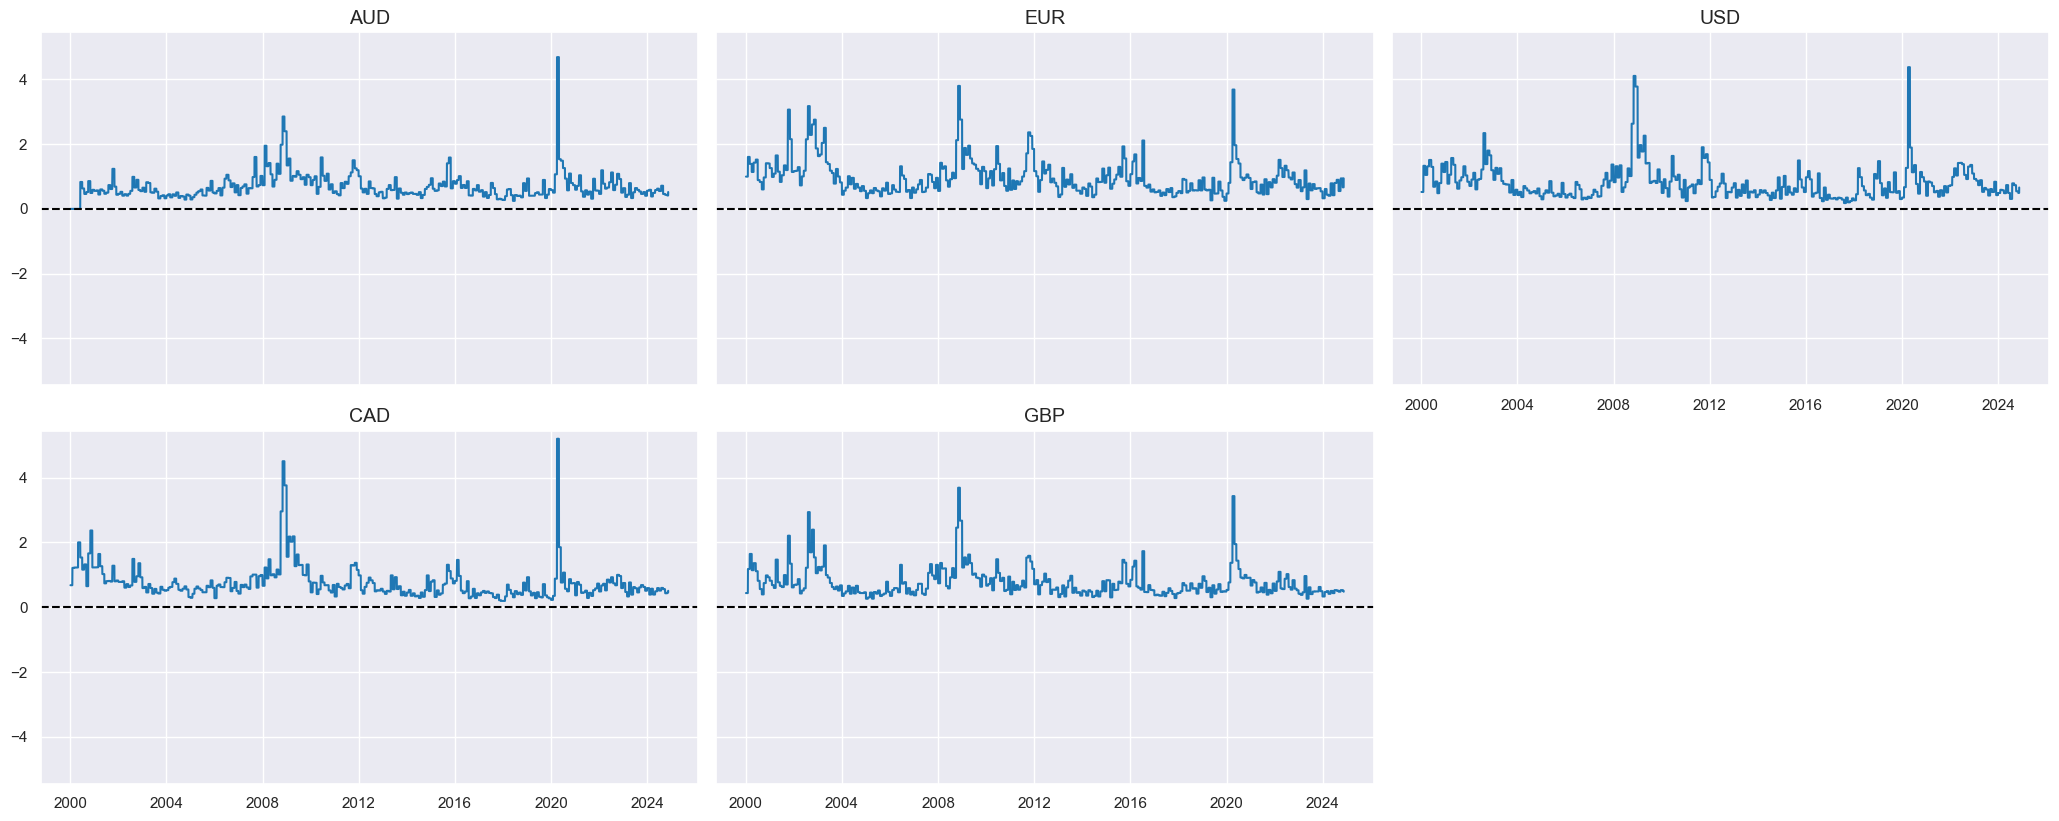

In [26]:

hdf = hv.to_pandas()

hdf = QuantamentalDataFrame.from_wide(
    (
        
        QuantamentalDataFrame(hdf)
        .to_wide()
        .reindex(
            pd.bdate_range(
                start=hdf["real_date"].min(),
                end=hdf["real_date"].max(),
                freq="B",
            ),
            method="ffill",
        )
        .dropna(axis="rows", how="all")
    ).sort_index(),
    categorical=False,
)

view_timelines(df=hdf)



In [27]:
starttime = time.time()
msyrs.qdf.pivot_dataframe_by_ticker(df=new_df).head(10)
print("Time taken: ", time.time() - starttime)

Time taken:  0.05393481254577637


In [28]:
# new_pd_df = macrosynergy.management.types.QuantamentalDataFrame(new_pd_df)

In [29]:
from macrosynergy.panel.historic_vol import historic_vol

new_df_pd = QuantamentalDataFrame(
    new_df.to_pandas(), categorical=False
)
cids = new_df_pd['cid'].unique().tolist()

starttime = time.time()
hv_bench = historic_vol(
    df=new_df_pd,
    xcat='EQXR_NSA',
    cids=cids,
    lback_periods=21,
    lback_meth="xma",
    half_life=11,
    est_freq="M",
    blacklist=None,
    remove_zeros=True,
    postfix="_HV_PY",
    nan_tolerance=0.001,
)
print(f"Time taken: {time.time() - starttime}")

starttime = time.time()
a = 1 + 5
print("Time taken: ", time.time() - starttime)

Time taken: 11.470224142074585
Time taken:  0.0


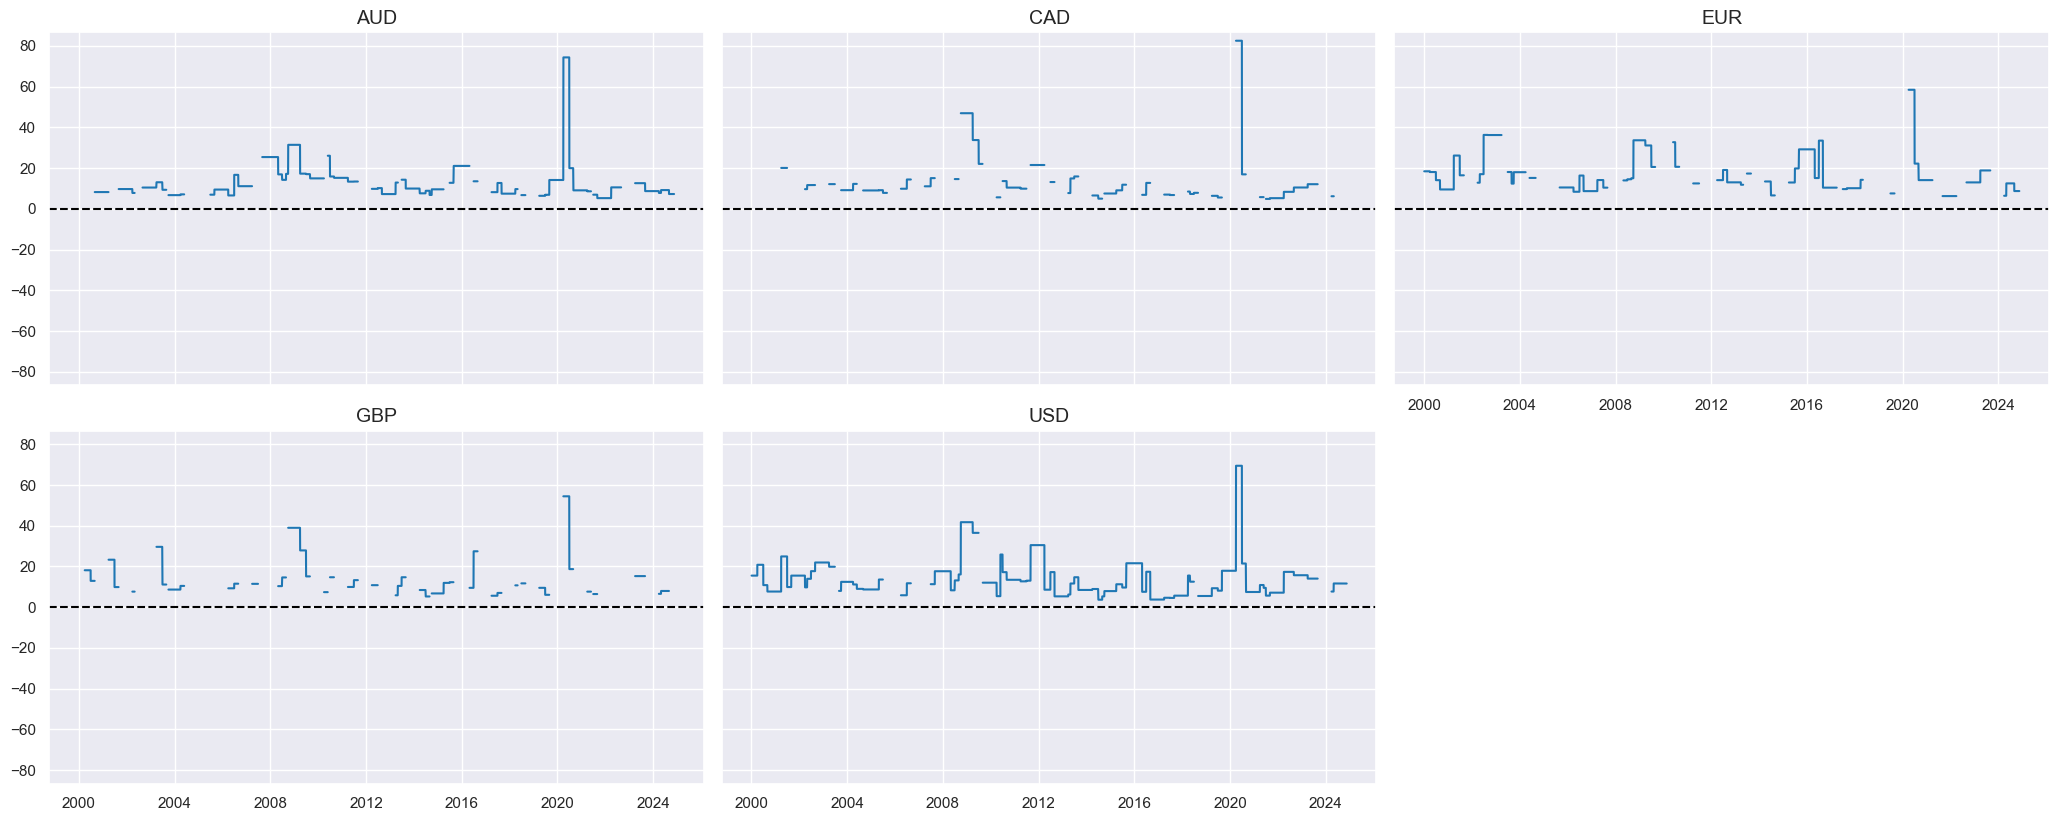

In [30]:
hv_bench = hv_bench.dropna(axis="rows", how="any").reset_index(drop=True)
bdr = pd.bdate_range(new_df_pd.real_date.min(), new_df_pd.real_date.max())
hv_bench = QuantamentalDataFrame.from_wide(
    QuantamentalDataFrame(hv_bench).to_wide().reindex(bdr, method="ffill"),
    categorical=False,
).reset_index(drop=True)

view_timelines(df=hv_bench)

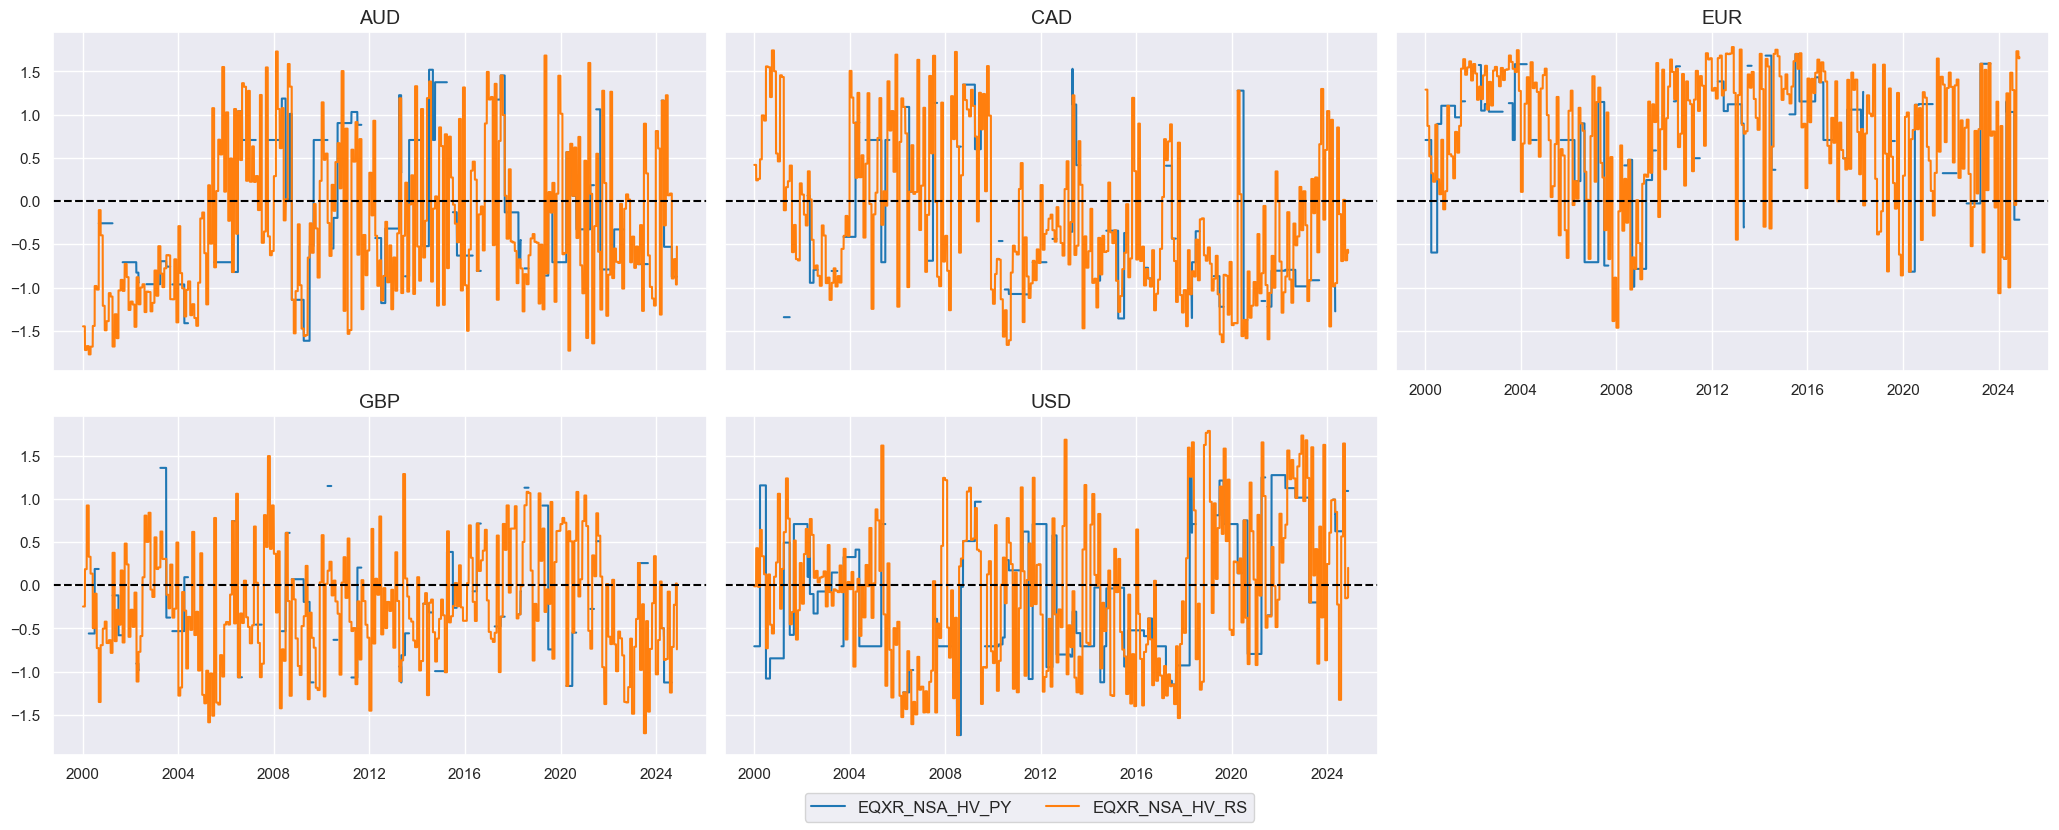

In [31]:
def zscore_series(s: pd.Series) -> pd.Series:
    return (s - s.mean()) / s.std()


a = QuantamentalDataFrame.from_wide(
    QuantamentalDataFrame(hv_bench)
    .to_wide()
    .apply(lambda x: zscore_series(x), axis=1, result_type="expand")
)

b = QuantamentalDataFrame.from_wide(
    QuantamentalDataFrame(hdf)
    .to_wide()
    .apply(lambda x: zscore_series(x), axis=1, result_type="expand")
)

view_timelines(QuantamentalDataFrame.from_qdf_list([a, b]).dropna(axis="rows", how="any").reset_index(drop=True))


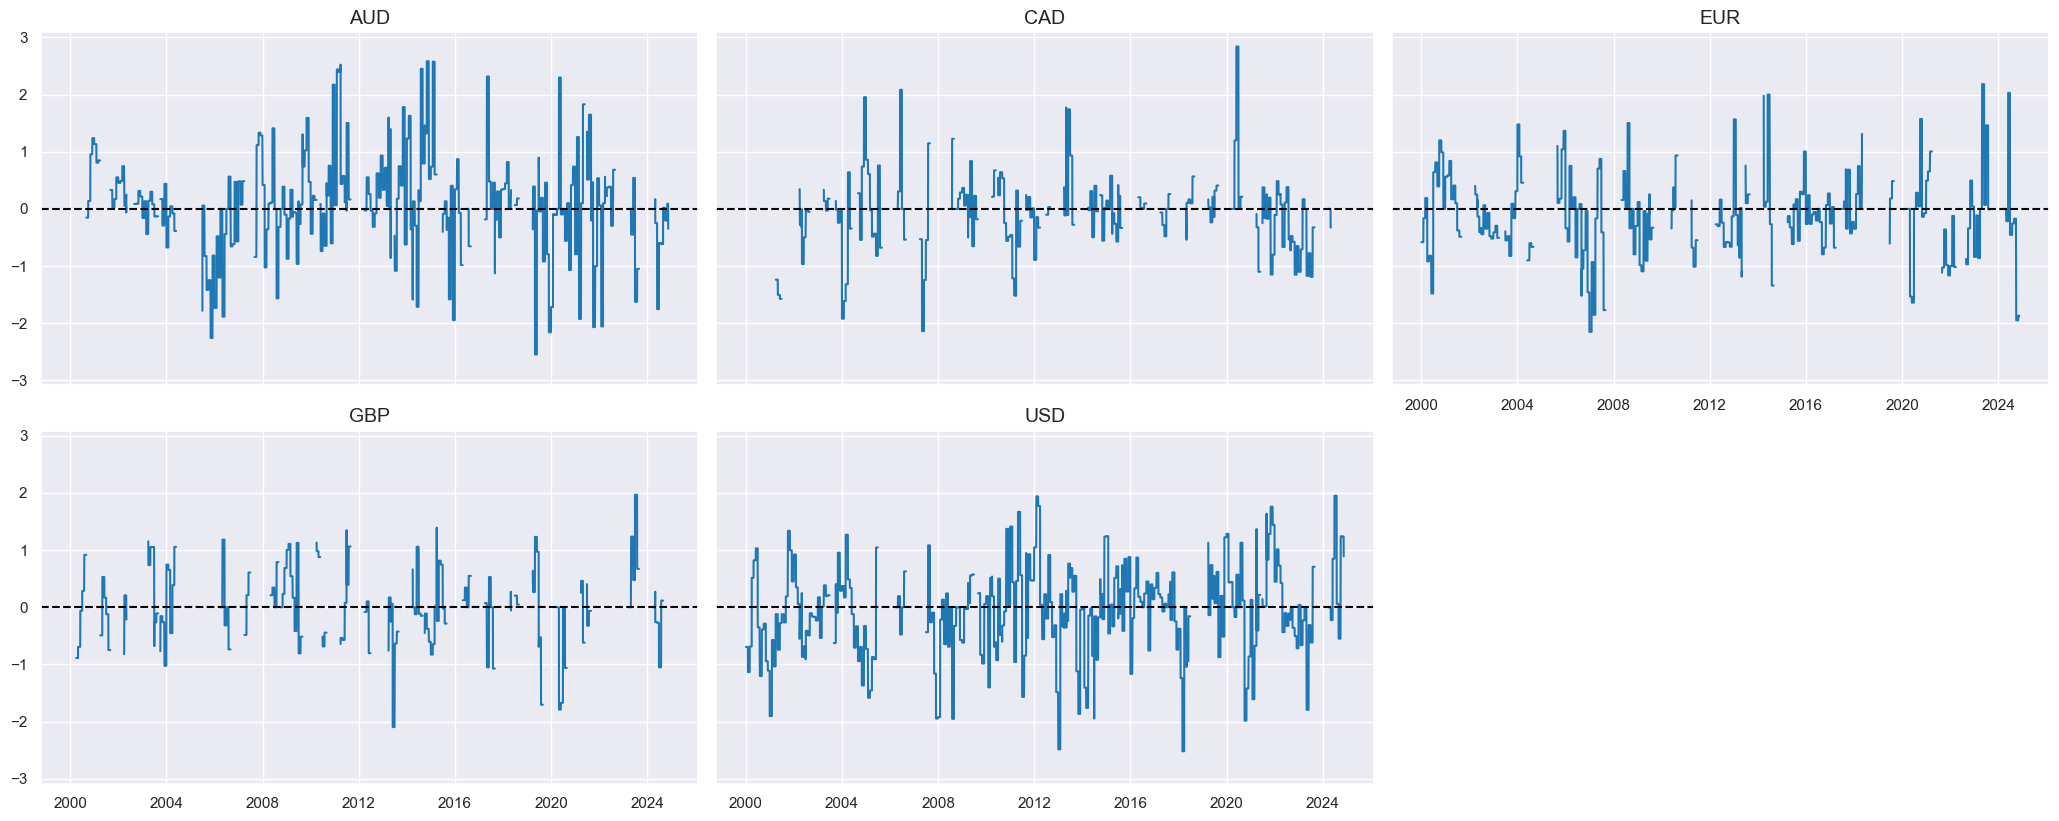

In [32]:
a = QuantamentalDataFrame(hv_bench).to_wide().apply(lambda x: zscore_series(x), axis=1, result_type="expand").rename(columns=lambda x: '_'.join(x.split("_")[:-1]))

b = QuantamentalDataFrame(hdf).to_wide().apply(lambda x: zscore_series(x), axis=1, result_type="expand").rename(columns=lambda x: '_'.join(x.split("_")[:-1]))

diff = a - b

view_timelines(QuantamentalDataFrame.from_wide(diff))

In [33]:
# starttime = time.time()
# new_pd_df.to_wide()
# print("Time taken: ", time.time() - starttime)

In [34]:
end_time = time.time()
print(f"Time taken: {end_time - nb_start_time} seconds")

Time taken: 21.64416742324829 seconds
